In [17]:
import numpy as np
import pandas as pd

In [18]:
train_positive_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/covid-chestxray-dataset-master/datasets/Positive"
train_positive_names= os.listdir(train_positive_dir)
print("Total Positive Samples : ",len(train_positive_names))

train_negative_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/covid-chestxray-dataset-master/datasets/Negative"
train_negative_dir= os.listdir(train_negative_dir)
print("Total Negative Samples : ",len(train_negative_dir))

<IPython.core.display.Javascript object>

Total Positive Samples :  35


<IPython.core.display.Javascript object>

Total Negative Samples :  35


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import argparse
from imutils import paths
import cv2
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [20]:
print("[INFO] loading images...")
imagePaths= list(paths.list_images("E:/Machine Learning/Machine Learning/Neural Networks/CNN/covid-chestxray-dataset-master/datasets"))
data=[]
labels=[]

for imagepath in imagePaths:
    label= imagepath.split(os.path.sep)[-2]
    
    image= cv2.imread(imagepath)
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(224,224))
    
    data.append(image)
    labels.append(label)
    
data = np.array(data) / 255.0
labels = np.array(labels)    
    


[INFO] loading images...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
lb= LabelBinarizer()
labels= lb.fit_transform(labels)
labels= to_categorical(labels)

In [22]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [23]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 validation_split=0.2)

In [35]:
train_generator= train_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/covid-chestxray-dataset-master/datasets",
                                                  batch_size=8,
                                                  target_size=(224,224),
                                                  class_mode="categorical",
                                                  subset="training")

Found 56 images belonging to 2 classes.


In [36]:
test_generator= train_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/covid-chestxray-dataset-master/datasets",
                                                  batch_size=8,
                                                  target_size=(224,224),
                                                  class_mode="categorical",
                                                  subset="validation")

Found 14 images belonging to 2 classes.


In [37]:
base_model= VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

In [38]:
headmodel= base_model.output
headmodel= Flatten()(headmodel)
headmodel= Dense(64,activation="relu")(headmodel)
headmodel= Dropout(0.5)(headmodel)
headmodel= Dense(2,activation="softmax")(headmodel)

In [39]:
model= Model(inputs=base_model.input, outputs=headmodel)

In [40]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [41]:
for layer in base_model.layers:
    layer.trainable= False

In [42]:
print("[INFO] compiling model..")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

[INFO] compiling model..


In [43]:
print("[INFO] training head...")
history= model.fit_generator(train_generator,
                            validation_data= test_generator,
                            epochs=5,
                            steps_per_epoch= len(train_generator),
                            validation_steps=len(test_generator))

[INFO] training head...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/5
7/7 [==============================] - 19s 3s/step - loss: 1.9314 - accuracy: 0.6071 - val_loss: 0.1664 - val_accuracy: 0.8571
Epoch 2/5
7/7 [==============================] - 19s 3s/step - loss: 0.6736 - accuracy: 0.8036 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 19s 3s/step - loss: 0.0756 - accuracy: 0.9464 - val_loss: 0.0798 - val_accuracy: 0.9286
Epoch 4/5
7/7 [==============================] - 19s 3s/step - loss: 0.1752 - accuracy: 0.9286 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 18s 3s/step - loss: 0.0665 - accuracy: 0.9643 - val_loss: 0.0062 - val_accuracy: 1.0000


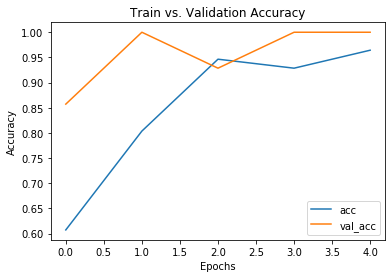

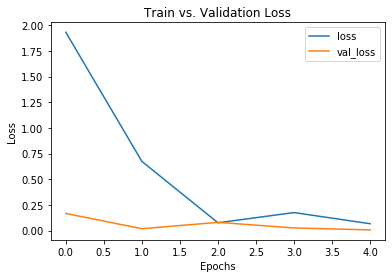

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

train_acc= history.history["accuracy"]
test_acc= history.history["val_accuracy"]

train_loss= history.history["loss"]
test_loss= history.history["val_loss"]

plt.plot(train_acc,label="acc")
plt.plot(test_acc,label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs. Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(train_loss,label="loss")
plt.plot(test_loss,label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs. Validation Loss")
plt.legend()
plt.show()
plt.savefig("covid19")

In [45]:
model.save("covid19_vgg16.h5")